In [1]:
using JLD, Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
include("cavitymethod.jl")

rho_bouchaud_population (generic function with 1 method)

In [3]:
Plots.scalefontsizes(1.5)

In [5]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
ensemble = Int64(10^5);

In [6]:
epsilon2 = 1.e-3

0.001

### c = 1

In [18]:
c = 1
T1 = 0.1
T2 = 10.

10.0

In [19]:
rho1 = [rho_barrat_population(i, c, T1, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

In [20]:
rho2 = [rho_barrat_population(i, c, T2, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

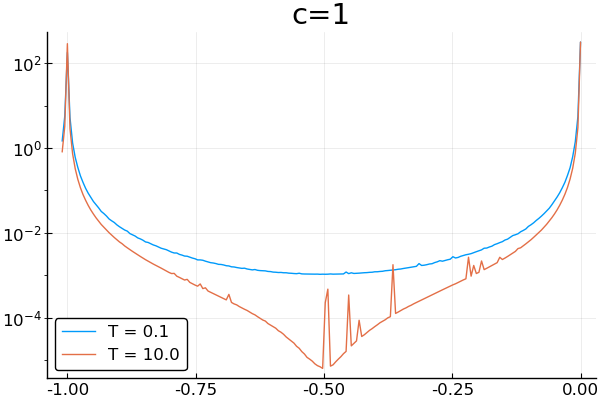

In [57]:
plot(lambda_barrat, rho1, label = "T = $(T1)", yscale = :log10);
plot!(lambda_barrat, rho2, label = "T = $(T2)", yscale = :log10, title = "c=1")

In [58]:
file3 = load("numericsc=1T=10.0.jld");
file4 = load("numericsc=1T=0.1.jld");

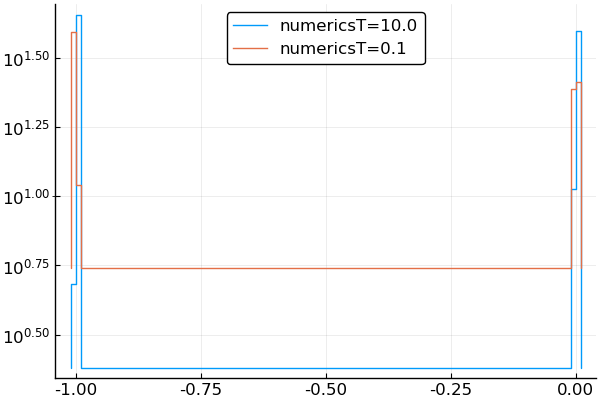

In [64]:
stephist(file3["eiges"], normed = true, yscale = :log10, nbins = 100, label = "numericsT=$(file3["T"])")
stephist!(real(file4["eiges"]), normed = true, yscale = :log10, nbins = 100, label = "numericsT=$(file4["T"])")

### c = 2

In [37]:
c = 2
T1 = 0.1
T2 = 10.

10.0

In [38]:
rho21 = [rho_barrat_population(i, c, T1, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

In [39]:
rho22 = [rho_barrat_population(i, c, T2, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

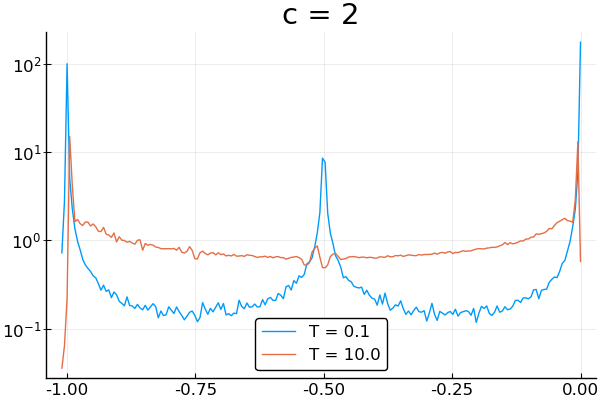

In [53]:
plot(lambda_barrat, rho21, label = "T = $(T1)", yscale = :log10);
plot!(lambda_barrat, rho22, label = "T = $(T2)", yscale = :log10, title = "c = $(c)")

In [54]:
file2 = load("numericsc=2T=10.0.jld");
file3 = load("numericsc=2T=0.1.jld");

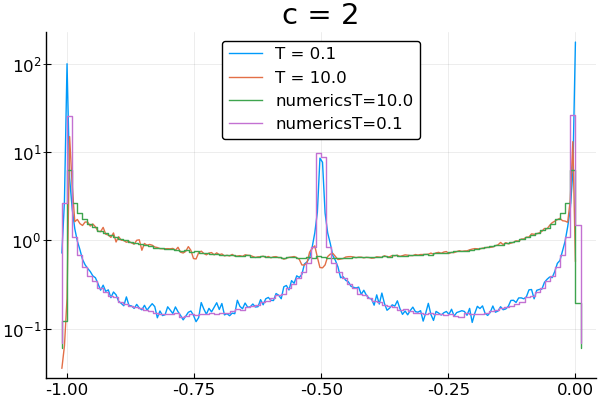

In [55]:
stephist!(file2["eiges"], normed = true, yscale = :log10, nbins = 100, label = "numericsT=$(file2["T"])")
stephist!(file3["eiges"], normed = true, yscale = :log10, nbins = 100, label = "numericsT=$(file3["T"])")

In [46]:
minimum(file2["eiges"])

-1.0000000000000515

## Different c's

In [7]:
T = 0.1
lambda_barrat = -linspace(-0.,1.01,200)

0.0:-0.005075376884422111:-1.01

In [8]:
connectivity = collect(1:2:7)

4-element Array{Int64,1}:
 1
 3
 5
 7

In [33]:
rho_ba = [rho_barrat_population(i, connectivity[1], T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

In [34]:
for c in connectivity[2:end]
    rho = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat]
    rho_ba = hcat(rho_ba, rho)
end

In [35]:
#plot(-l, rho, label = "T=$T", yscale = :log10)
plot(lambda_barrat, rho_ba[:,1], label = "c = $(connectivity[1])", yscale = :log10);

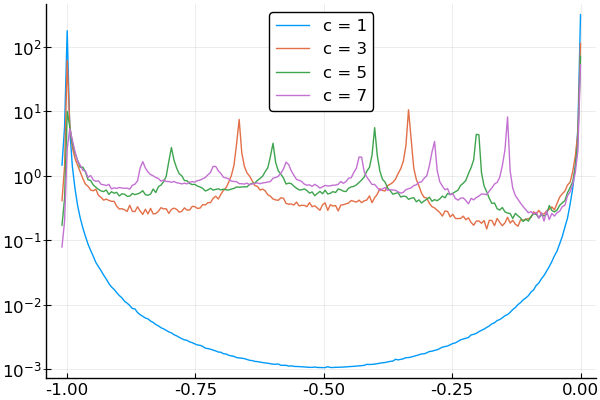

In [36]:
for k in 2:length(connectivity)
    plot!(lambda_barrat, rho_ba[:,k], label = "c = $(connectivity[k])", yscale = :log10)
end 
plot!()